# Import Libraries

In [63]:
import os
import sys

util_path = os.path.abspath(os.path.join('..'))

if util_path not in sys.path:
    sys.path.append(util_path)

import utility_func as util
import importlib
importlib.reload(util)

<module 'utility_func' from 'D:\\GitUpload\\CMT-GSC-AI\\utility_func.py'>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [5]:
curr_dir = (os.getcwd()).replace('\\', '/')
curr_dir = os.path.abspath(os.path.join(curr_dir, '..'))
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [6]:
str_sed_data = util.pd.read_csv(data_path + '/Kodangal dataset/proc_elem_Kodangal_gcM.csv')

In [7]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,hf,ta,w,u,toposheet,in_,f,te,tl,hg
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,44.750,10.930,3.312,0.560,6.20,...,5.746369,0.862203,0.991997,1.811020,56G04,0.052741,322.0,0.101815,0.293517,17.0
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,45.129,10.930,3.748,0.580,6.20,...,7.857656,0.958655,0.943758,2.203597,56G04,0.048799,336.0,0.072979,0.300787,8.0
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,58.283,12.534,7.768,1.321,2.91,...,8.728652,1.428838,1.682294,2.711943,56G04,0.126064,205.0,0.121959,0.481961,12.0
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,61.180,11.670,8.340,1.420,2.43,...,9.365000,1.542800,1.803219,2.982200,56G04,0.084033,230.0,0.071592,0.427797,10.0
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,60.300,11.470,8.270,1.430,1.99,...,10.693400,1.467300,1.451395,3.249200,56G04,0.083470,300.0,0.067475,0.447018,7.0


# Regression

# EDA

In [8]:
str_elem = util.elem_list(str_sed_data)

In [9]:
len(str_elem)

61

In [10]:
elem_df = str_sed_data[str_elem]
elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,lu,hf,ta,w,u,in_,f,te,tl,hg
0,44.750,10.930,3.312,0.560,6.20,1.573,0.073,0.152,1.258,0.129,...,0.335326,5.746369,0.862203,0.991997,1.811020,0.052741,322.0,0.101815,0.293517,17.0
1,45.129,10.930,3.748,0.580,6.20,1.480,0.109,0.167,1.207,0.080,...,0.391008,7.857656,0.958655,0.943758,2.203597,0.048799,336.0,0.072979,0.300787,8.0
2,58.283,12.534,7.768,1.321,2.91,1.912,0.192,0.050,0.800,0.061,...,0.508111,8.728652,1.428838,1.682294,2.711943,0.126064,205.0,0.121959,0.481961,12.0
3,61.180,11.670,8.340,1.420,2.43,1.710,0.180,0.250,0.660,0.080,...,0.531900,9.365000,1.542800,1.803219,2.982200,0.084033,230.0,0.071592,0.427797,10.0
4,60.300,11.470,8.270,1.430,1.99,1.610,0.170,0.230,0.580,0.061,...,0.524000,10.693400,1.467300,1.451395,3.249200,0.083470,300.0,0.067475,0.447018,7.0


### Histogram plots

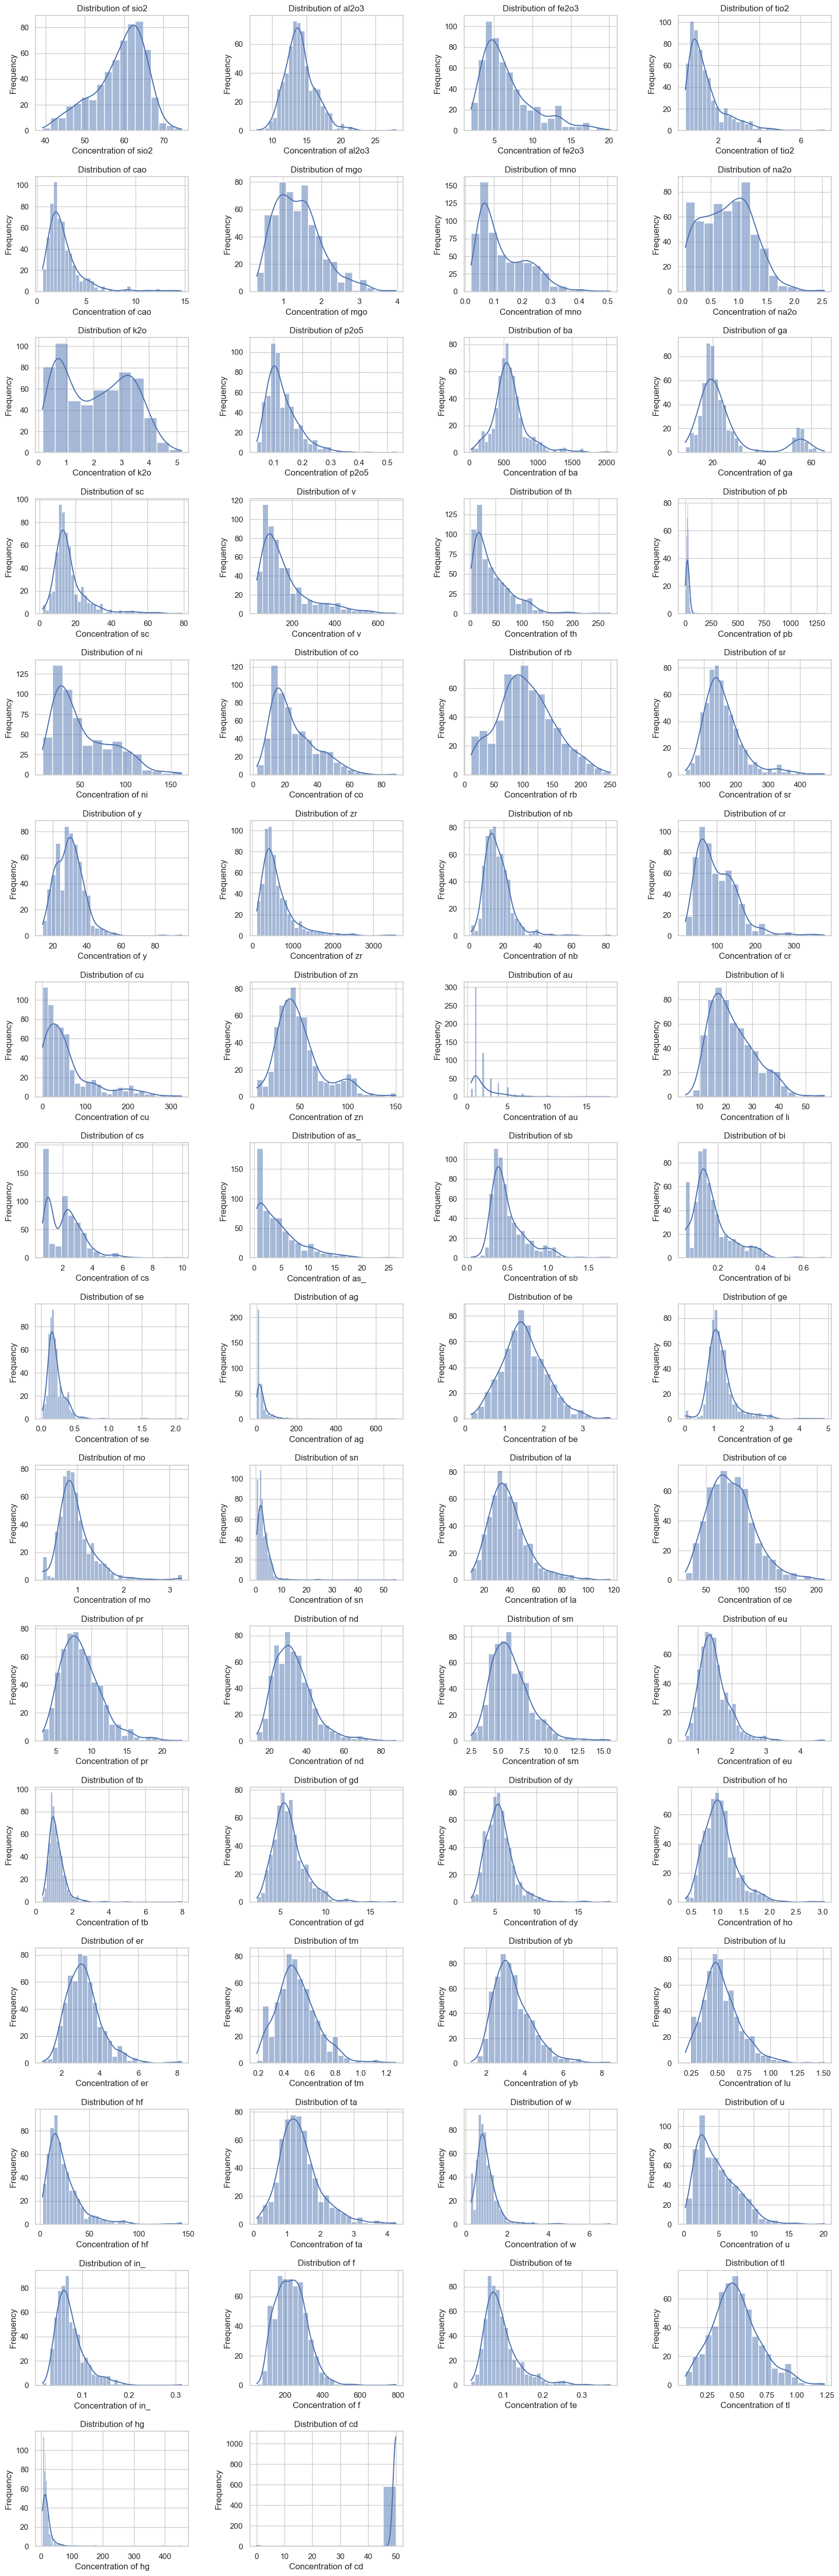

In [92]:
num_elem = len(str_elem)
num_cols = 4
num_rows = (num_elem + num_cols - 1)//num_cols 

sns.set(style='whitegrid')

fig, axes = plt.subplots(num_rows, 
                         num_cols, 
                         figsize=(num_cols*5, num_rows*4))

fig.subplots_adjust(hspace=0.4, 
                    wspace=0.4)

for i, elem in enumerate(str_elem):

    ax = axes[i // num_cols, i % num_cols]  # Determine the position in the grid
    sns.histplot(elem_df[elem], 
                 kde=True, 
                 ax=ax)
    ax.set_title(f'Distribution of {elem}')
    ax.set_xlabel(f'Concentration of {elem}')
    ax.set_ylabel('Frequency')

# If there are any empty subplots in the grid, hide them
for j in range(i + 1, num_rows * num_cols):
    axes[j // num_cols, j % num_cols].axis('off')

plt.show()

## Boxplots

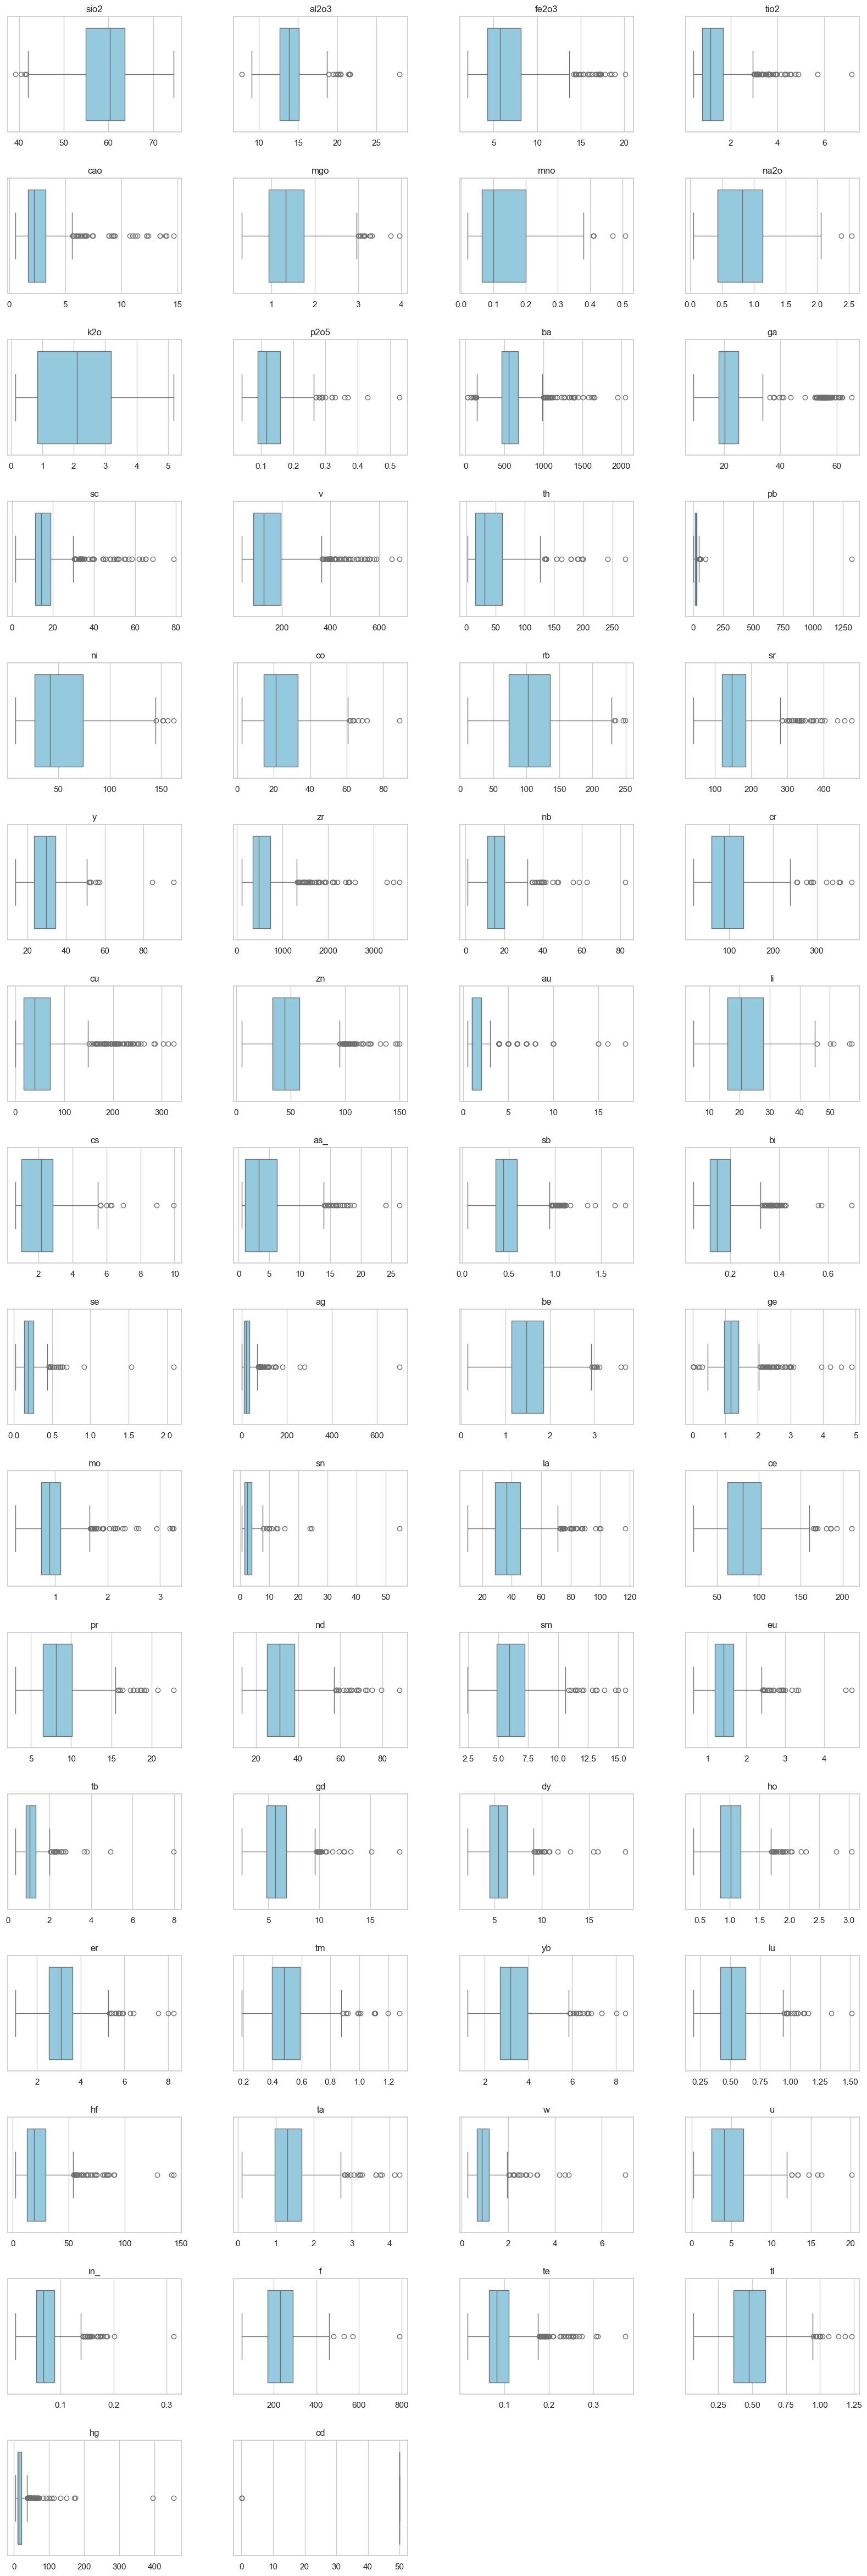

In [93]:
n_elem = len(str_elem)

fig, axes = plt.subplots(nrows=(n_elem+4-1)//4, 
                         ncols=4, 
                         figsize=(20, 4 * (n_elem//4)))

fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

# Plot each element in its subplot
for i, (elem, ax) in enumerate(zip(str_elem, axes.flatten())):
    sns.boxplot(x=elem_df[str_elem][elem], 
                ax=ax, 
                color="skyblue")
    ax.set_title(elem)
    ax.set_xlabel('')  # Clear the x-labels if they clutter the plot

#If there are any leftover axes, turn them off
for j in range(i + 1, ((n_elem+4-1)//4) * 4):
    axes.flatten()[j].set_visible(False)

plt.show()

## Drop elements based on certain condition

- Elements having concentration values less than 1

In [11]:
drop_elem = ['mno', 'p2o5', 'sb', 'bi', 'se', 'ho', 'tm', 'lu', 'in_', 'te', 'tl']

In [12]:
elem_df.drop(drop_elem, axis=1, inplace=True)

# Feature Selection

## Split into train, validation and test data

In [13]:
train_df = elem_df.copy()
target = elem_df['cu']
train_df.drop(['cu'], axis=1, inplace=True)

In [14]:
X_train, X_test, y_train, y_test = util.train_test_split(train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [15]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

## Normalize

In [14]:
rs = util.RobustScaler()

norm_data = rs.fit_transform(X_train)

X_train_norm = util.pd.DataFrame(norm_data, 
                                 index=X_train.index, 
                                 columns=X_train.columns)

## Estimator: Random Forest

In [15]:
# rf = RandomForestRegressor(max_depth= 30, max_features='log2', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100, n_jobs=-1)
# rf = RandomForestRegressor(max_depth= 10, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, n_jobs=-1)
rf = util.RandomForestRegressor()
rfecv_rf = util.rfecv(rf, X_train_norm, y_train, 1, 5)

In [16]:
print('Optimal number of features: {}'.format(rfecv_rf.n_features_))

Optimal number of features: 20


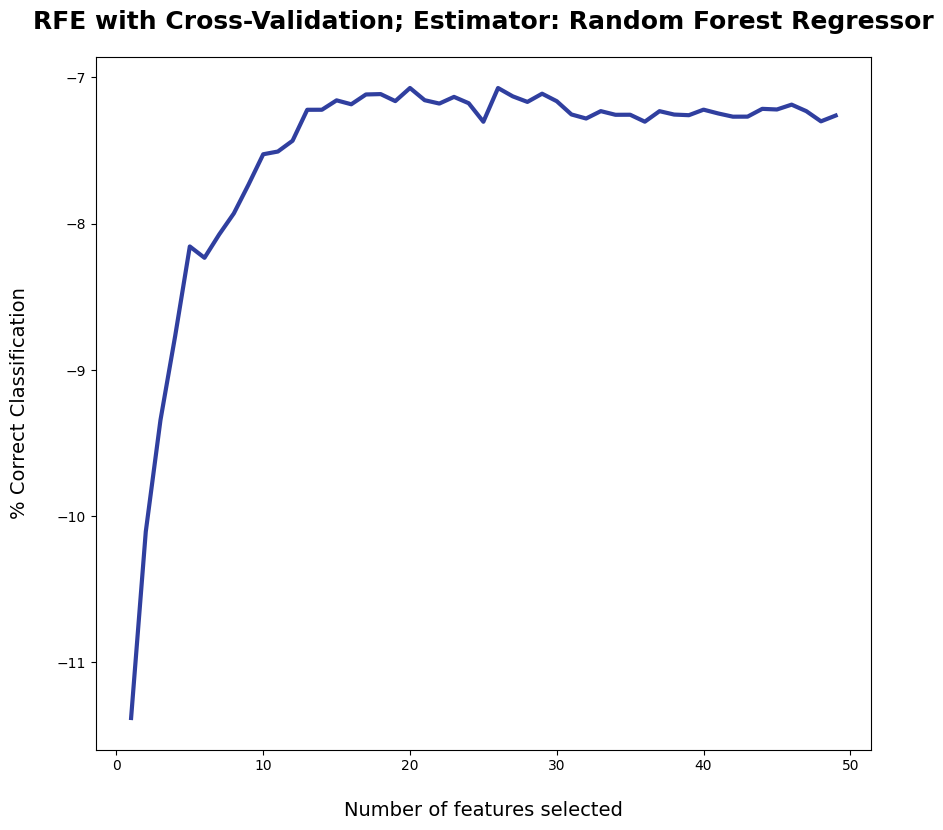

In [17]:
util.plot_pcc(rfecv_rf, 'RFE with Cross-Validation; Estimator: Random Forest Regressor')

In [18]:
X_rf = X_train_norm.drop(X_train_norm.columns[util.np.where(rfecv_rf.support_ == False)[0]], axis=1)

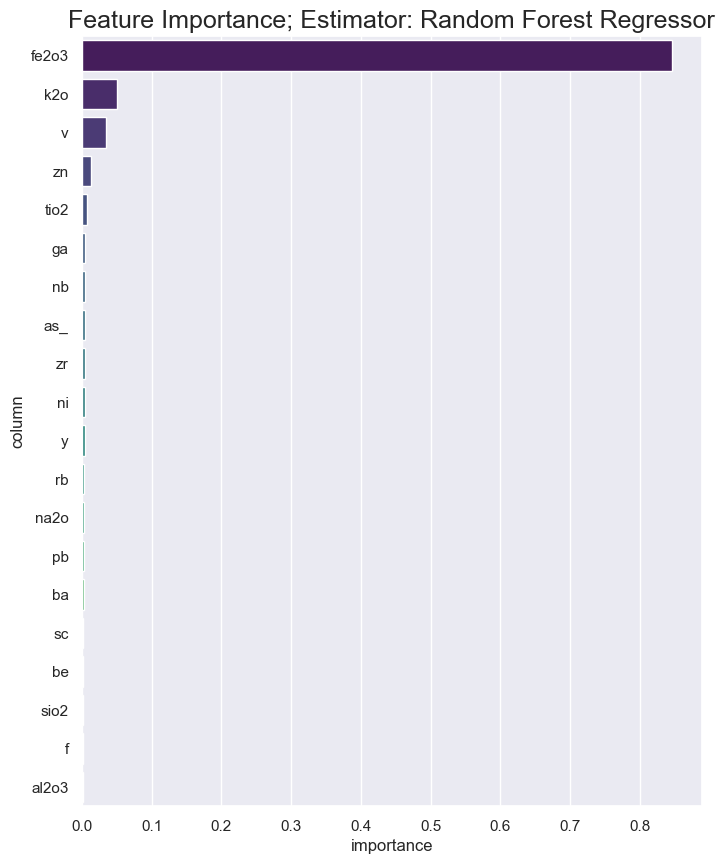

In [19]:
util.feature_importance(rfecv_rf, X_rf, 'Feature Importance; Estimator: Random Forest Regressor')

In [20]:
# X_rf = X_rf[['sio2', 'zn', 'co', 'k2o', 'rb', 'mno', 'ni']]
# X_rf = X_rf[['fe2o3', 'k2o', 'v', 'zn', 'tio2', 'sio2', 'co', 'ni', 'rb', 'cr', 'th', 'zr']]

## Estimator: Gradient Boosting

In [40]:
gbr = util.GradientBoostingRegressor()
rfecv_bgr = util.rfecv(gbr, X_train_norm, y_train, 1, 5)

In [41]:
print('Optimal number of features: {}'.format(rfecv_bgr.n_features_))

Optimal number of features: 42


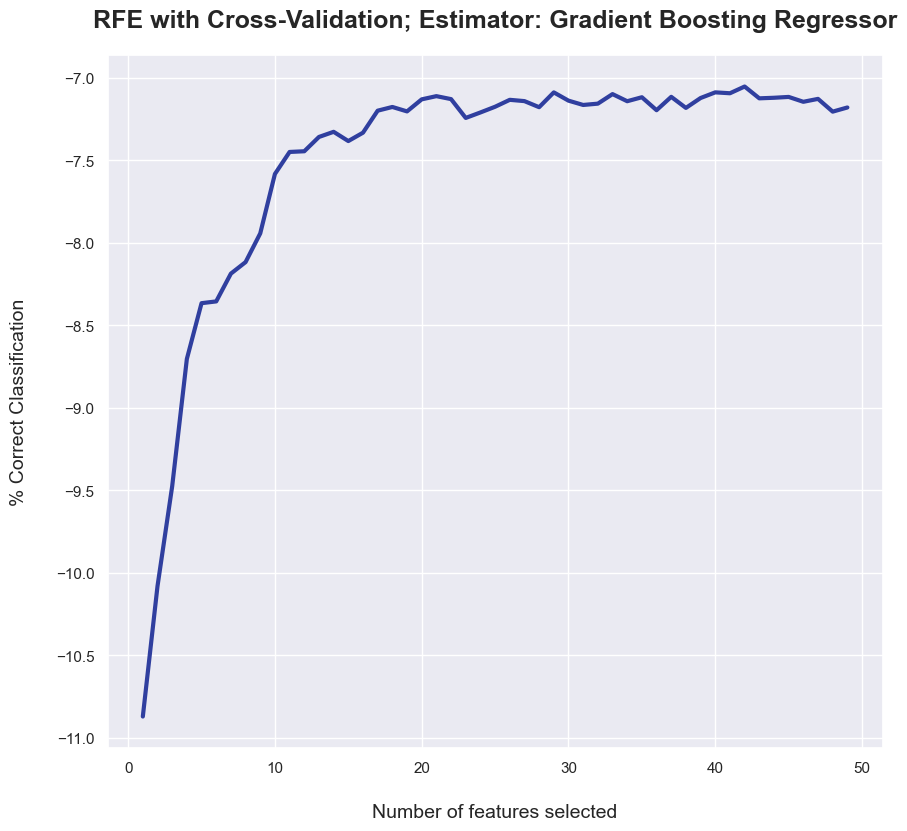

In [42]:
util.plot_pcc(rfecv_bgr, 'RFE with Cross-Validation; Estimator: Gradient Boosting Regressor')

In [43]:
X_gbr = X_train_norm.drop(X_train_norm.columns[util.np.where(rfecv_bgr.support_ == False)[0]], axis=1)

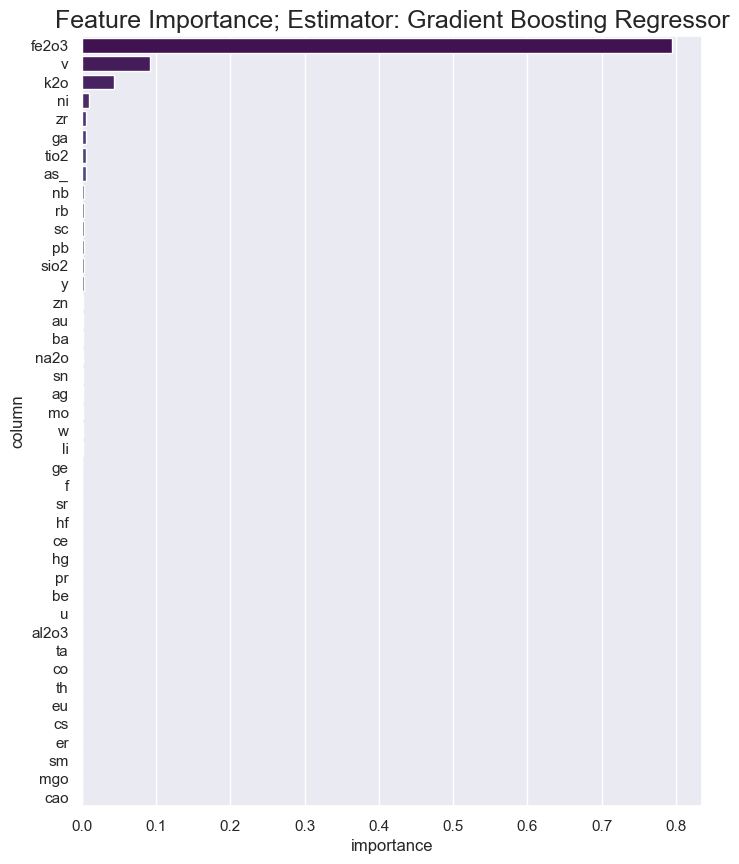

In [44]:
util.feature_importance(rfecv_bgr, X_gbr, 'Feature Importance; Estimator: Gradient Boosting Regressor')

In [101]:
X_gbr = X_gbr[['v', 'fe2o3', 'rb', 'k2o', 'cr', 'zr']]

# Model Training

In [20]:
train_df = elem_df[X_rf.columns]

In [21]:
X_train, X_test, y_train, y_test = util.train_test_split(train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [22]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

In [23]:
rs = util.RobustScaler()

norm_data = rs.fit_transform(X_train)

X_train_norm = util.pd.DataFrame(norm_data, 
                                 index=X_train.index, 
                                 columns=X_train.columns)

## Random Forest

- Estimator: Random Forest

In [24]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [1, 2, 3, 4, 'sqrt'],   # Number of features to consider at every split
    'max_depth': [10, 20, 30],    # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
}

rf = util.RandomForestRegressor()

grid_search_rfr_rf = util.GridSearchCV(rf, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_rfr_rf.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_params = grid_search_rfr_rf.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


### Run the models on validation data

In [25]:
y_pred_val = util.pred_val(X_val, rs, grid_search_rfr_rf)

In [26]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 4.46
Mean Absolute Error: 8.9
R-squared Error: 0.93


### Run the model on test data

In [27]:
y_pred = util.pred_val(X_test, rs, grid_search_rfr_rf)

In [28]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 4.48
Mean Absolute Error: 8.04
R-squared Error: 0.94


### Learning Curve

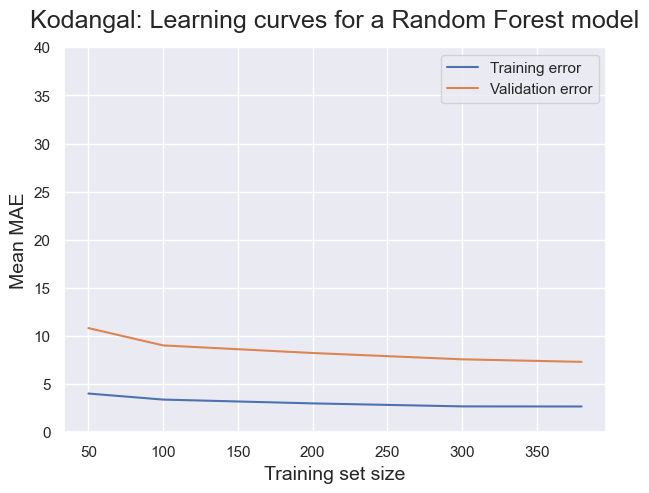

In [29]:
util.plot_learing_curve(util.RandomForestRegressor(max_depth=30, 
                                                   max_features='sqrt', 
                                                   min_samples_leaf=1, 
                                                   min_samples_split=2, 
                                                   n_estimators=300), 
                        X_train_norm, y_train, 5, 'Random Forest', 'Kodangal')

In [30]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

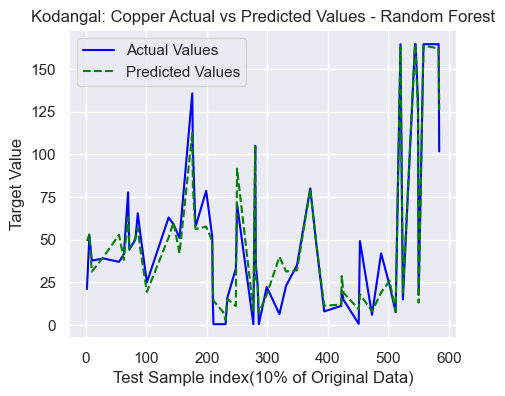

In [31]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Kodangal: Copper Actual vs Predicted Values - Random Forest')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

- Estimator: Gradient Boosting

In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [1, 2, 3, 4, 'sqrt'],   # Number of features to consider at every split
    'max_depth': [10, 20, 30],    # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
}

rf = util.RandomForestRegressor()

grid_search_rfr_gb = util.GridSearchCV(rf, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_rfr_gb.fit(X_gbr, y_train)

# Get the best hyperparameters
best_params = grid_search_rfr_gb.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Run the models on validation data

In [47]:
y_pred_val = util.pred_val(X_val, list(X_gbr.columns), rs, grid_search_rfr_gb)

In [49]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 5.08
Mean Absolute Error: 9.2
R-squared Error: 0.93


### Run the model on test data

In [50]:
y_pred = util.pred_val(X_test, list(X_gbr.columns), rs, grid_search_rfr_gb)

In [51]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 6.06
Mean Absolute Error: 8.6
R-squared Error: 0.93


## XGBoost

- Estimator: Random Forest

In [32]:
param_grid = {
    'n_estimators': [200, 300],    
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5, 7],          
    'colsample_bytree': [0.5, 0.7, 1.0], 
    'subsample': [0.5, 0.7, 1.0],        
    'gamma': [0.1, 0.2],             
    'reg_alpha': [0.5, 1],       
    'reg_lambda': [0.5, 1],           
    'objective': ['reg:squarederror']
}

xgb = util.xgboost.XGBRegressor()

grid_search_xgb_rf = util.GridSearchCV(xgb, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_xgb_rf.fit(X_train_norm, y_train)

# Get the best hyperparameters
best_params = grid_search_xgb_rf.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Hyperparameters: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'objective': 'reg:squarederror', 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'subsample': 0.7}


### Run the model on validation data

In [33]:
y_pred_val = util.pred_val(X_val, rs, grid_search_xgb_rf)

In [34]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 4.08
Mean Absolute Error: 8.01
R-squared Error: 0.94


### Run the model on test data

In [35]:
y_pred = util.pred_val(X_test, rs, grid_search_xgb_rf)

In [36]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 3.79
Mean Absolute Error: 7.56
R-squared Error: 0.94


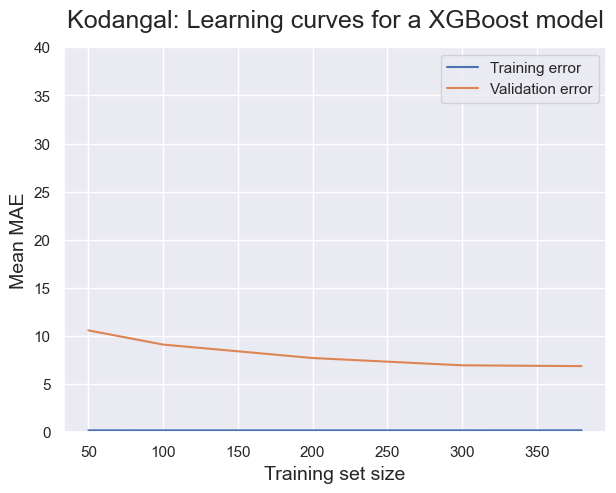

In [37]:
util.plot_learing_curve(util.xgboost.XGBRegressor(colsample_bytree=0.5, 
                                                  gamma=0.2, 
                                                  learning_rate=0.1, 
                                                  max_depth=5, 
                                                  n_estimators=300, 
                                                  objective='reg:squarederror', 
                                                  reg_alpha=0.5, 
                                                  reg_lambda=0.5, 
                                                  subsample=0.7), 
                        X_train_norm, y_train, 5, 'XGBoost', 'Kodangal')

In [38]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

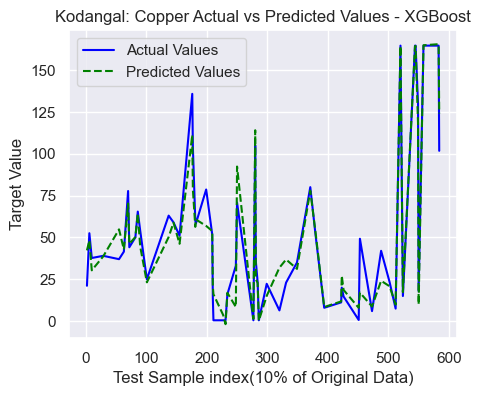

In [39]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Kodangal: Copper Actual vs Predicted Values - XGBoost')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

- Estimator: Gradient Boosting

In [52]:
param_grid = {
    'n_estimators': [200, 300],    
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5, 7],          
    'colsample_bytree': [0.5, 0.7, 1.0], 
    'subsample': [0.5, 0.7, 1.0],        
    'gamma': [0.1, 0.2],             
    'reg_alpha': [0.5, 1],       
    'reg_lambda': [0.5, 1],           
    'objective': ['reg:squarederror']
}

xgb = util.xgboost.XGBRegressor()

grid_search_xgb_gb = util.GridSearchCV(xgb, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_xgb_gb.fit(X_gbr, y_train)

# Get the best hyperparameters
best_params = grid_search_xgb_gb.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'objective': 'reg:squarederror', 'reg_alpha': 1, 'reg_lambda': 0.5, 'subsample': 0.7}


### Run the model on validation data

In [53]:
y_pred_val = util.pred_val(X_val, list(X_gbr.columns), rs, grid_search_xgb_gb)

In [54]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 5.09
Mean Absolute Error: 9.01
R-squared Error: 0.94


### Run the model on test data

In [55]:
y_pred = util.pred_val(X_test, list(X_gbr.columns), rs, grid_search_xgb_gb)

In [56]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 3.99
Mean Absolute Error: 7.67
R-squared Error: 0.93


# Saving the models

In [17]:
model_path = (os.path.join(curr_dir, 'Models/Kodangal/')).replace('\\', '/')

In [52]:
## Robust Scaler model
with open(model_path + 'rs_norm_cu.pkl', 'wb') as file:
    util.pkl.dump(rs, file)

# Random Forest with RF estimator
with open(model_path + 'RFR_RF_cu.pkl', 'wb') as file:
    util.pkl.dump(grid_search_rfr_rf, file)

# # Random Forest with GB estimator
# with open(model_path + 'RFR_GB.pkl', 'wb') as file:
#     pkl.dump(grid_search_rfr_gb, file)

# XGBoost with RF estimator
with open(model_path + 'XGB_RF_cu.pkl', 'wb') as file:
    util.pkl.dump(grid_search_xgb_rf, file)

# # XGBoost with GB estimator
# with open(model_path + 'XGB_GB.pkl', 'wb') as file:
#     pkl.dump(grid_search_xgb_rf, file)

In [43]:
X_train_norm_df = util.pd.DataFrame(X_train_norm.columns, columns=['Elements'])
with util.pd.ExcelWriter(data_path + '/Kodangal dataset/Kodangal_element_names.xlsx', engine='openpyxl', mode='a') as writer:
    X_train_norm_df.to_excel(writer, sheet_name='Copper', index=False)

# Test the models

In [18]:
with open(model_path + 'rs_norm_cu.pkl', 'rb') as file:
    rs = util.pkl.load(file)

with open(model_path + 'RFR_RF_cu.pkl', 'rb') as file:
    grid_search_rfr_rf = util.pkl.load(file)
    
with open(model_path + 'XGB_RF_cu.pkl', 'rb') as file:
    grid_search_xgb_rf = util.pkl.load(file)

In [20]:
y_test

520    164.50
284     23.40
512      7.50
331     23.00
210     13.55
90      54.00
299     22.30
181     60.20
544    164.50
137     63.00
545    164.50
70      77.70
394      7.98
234     16.00
422     11.20
155     51.00
209     51.70
371     80.00
502     23.34
182     58.30
280    105.00
227      0.50
2       21.12
558    164.50
199     78.60
63      41.50
55      37.00
583    164.50
286      0.50
29      39.00
473      6.00
231      0.50
584    101.70
249     48.45
82      50.00
320      6.42
281     35.80
176    135.70
453     49.20
550     17.90
248     33.09
211      0.50
177    103.90
10      37.70
426     14.70
524     15.00
6       52.50
488     42.00
349     35.00
277      0.50
145     59.00
549    129.90
72      44.10
451      0.70
250     70.80
423     20.00
101     25.00
86      65.40
380     50.50
Name: cu, dtype: float64

In [21]:
new_obsrv = elem_df[elem_df.index == 520].drop('cu', axis=1)
new_obsrv = new_obsrv[['sio2', 'al2o3', 'fe2o3', 'tio2', 'na2o', 'k2o', 'ba', 'ga', 'sc', 'v', 'pb', 'ni', 'rb', 'y', 'zr', 'nb', 'zn', 'as_', 'be', 'f']]
new_obsrv

,sio2,al2o3,fe2o3,tio2,na2o,k2o,ba,ga,sc,v,pb,ni,rb,y,zr,nb,zn,as_,be,f
520,41.96,14.17,16.0,3.28,0.19,0.44,482.6,25.0,13.8,385.4,13.3,139.1,45.062532,38.6,287.6,37.5,97.6,6.873942,1.59127,280.0


In [22]:
y_pred = util.pred_val(new_obsrv, rs, grid_search_rfr_rf)
y_pred

array([162.6413])

# Classification bins

In [80]:
def create_actual_vs_pred_df(path, X, y_train, y_test, bins, rs, model, element_name):
    symb_df = util.pd.read_excel(path, sheet_name=element_name)
    X = X[list(symb_df['Elements'])]

    y_pred = util.pred_val(X, rs, model)

    pred_catg, bins, y_pred = util.predict_ml(y_pred, y_train, bins)

    return [pred_catg, bins, y_pred]

In [109]:
path = data_path + '/Kodangal dataset/Kodangal_element_names.xlsx'
pred_catg_rf, bins, y_pred_rf = create_actual_vs_pred_df(path, X_test, y_train, y_test, 5, rs, grid_search_rfr_rf, 'Copper')
pred_catg_xgb, bins, y_pred_xgb = create_actual_vs_pred_df(path, X_test, y_train, y_test, 5, rs, grid_search_xgb_rf, 'Copper')

In [111]:
catg = list(set(pred_catg_xgb))
catg

['40-60%', '20-40%', '0-20%', '80-100%', '60-80%']

In [112]:
def extract_lower_bound(range_str):
    # Extract the first number using regular expressions
    return int(util.re.findall(r'\d+', range_str)[0])

catg = sorted(catg, key=extract_lower_bound)

bins_range = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

ppm_conc_cu = util.pd.DataFrame({
    'ppm' : bins_range,
    '% range' : catg
})
ppm_conc_cu

,ppm,% range
0,0.5-11.8,0-20%
1,11.8-30.0,20-40%
2,30.0-48.1,40-60%
3,48.1-93.0,60-80%
4,93.0-164.5,80-100%


In [114]:
catg, bin_edges, y = util.predict_ml(elem_df['cu'], elem_df['cu'], 5)
cu_dict = {
    'ppm values rf' : list(elem_df['cu']),
    'ppm values xgb' : list(elem_df['cu']),
    'ppm range rf' : catg,
    'ppm range xgb' : catg
}
cu_df = util.pd.DataFrame(cu_dict)

In [115]:
cu_df.loc[list(y_test.index), 'ppm values rf'] = y_pred_rf
cu_df.loc[list(y_test.index), 'ppm range rf'] = pred_catg_rf
cu_df.loc[list(y_test.index), 'ppm values xgb'] = y_pred_xgb
cu_df.loc[list(y_test.index), 'ppm range xgb'] = pred_catg_xgb

In [116]:
dict = {
    'Actual' : elem_df['cu'],
    'Predicted(rf)' : cu_df['ppm values rf'].tolist(),
    'Pred Bins(rf)' : cu_df['ppm range rf'].tolist(),
    'Predicted(xgb)' : cu_df['ppm values xgb'].tolist(),
    'Pred Bins(xgb)' : cu_df['ppm range xgb'].tolist()
}

df = util.pd.DataFrame(dict)

In [117]:
with util.pd.ExcelWriter(data_path + '/Kodangal dataset/actual_vs_pred_Kodangal_gcM.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='Copper', index=False)